In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = 'latin_1')
pd.set_option('display.max_columns', None)
df.sample(10)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
138871,201410080064,2014,10,8,NaN,0,NaN,19,Bangladesh,6,South Asia,Khulna,Harabhanga,23.925320,88.763116,1.0,0,NaN,10/08/2014: An explosive device detonated at a...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,Not Applicable,Civilian: Rehena Khatun,19.0,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,17.0,Other Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A crude bomb was used in the attack.,0.0,0.0,0.0,1.0,0.0,0.0,-9,NaN,NaN,NaN,It is unknown if the home was damaged in this ...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Woman hurt in bomb blast,"" Bangladesh Daily S...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
88053,200807250003,2008,7,25,NaN,0,NaN,92,India,6,South Asia,Karnataka,Bangalore,12.928004,77.503795,1.0,0,The explosion occurred at a car showroom next ...,"07/25/2008: On Friday afternoon, a series of e...",1,1,1,0.0,NaN,NaN,1.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,7.0,Retail/Grocery/Bakery,NaN,A car showroom next to the Regional Transport ...,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,The specific motive for the attack is unknown.,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,17.0,Other Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"An improvised explosive device was used, const...",1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,No details were provided regarding the damages...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This was one of eight related attacks (cf. 200...,"Lexis Nexis, ""Three killed, 20 wounded in seve...","Lexis Nexis, ""One killed as bombs go off in In...",NaN,ISVG,-9,-9,0,-9,"200807250003, 200807250005, 200807250006, 2008..."
64462,199701190007,1997,1,19,NaN,0,NaN,209,Turkey,10,Middle East & North Africa,Mardin,Savur,37.537556,40.887996,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,NaN,Govt building,209.0,Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kurdistan Workers' Party (PKK),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firearm,2.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Days','country_txt':'Country','region_txt':'Region','provstate' : 'State',
    'attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubType','motive':'Motive',
    'weaptype1_txt':'WeaponType','nkill': 'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_name'
}, inplace = True)

df = df[['Year', 'Month', 'Days', 'Country', 'Region', 'State', 'AttackType', 'TargetType', 'TargetSubType' , 'Motive', 'WeaponType', 
        'Killed', 'Wounded', 'Summary', 'Group_name']]
df.sample(20)

,Year,Month,Days,Country,Region,State,AttackType,TargetType,TargetSubType,Motive,WeaponType,Killed,Wounded,Summary,Group_name
48512,1991,10,11,South Africa,Sub-Saharan Africa,Gauteng,Armed Assault,Private Citizens & Property,Marketplace/Plaza/Square,NaN,Firearms,1.0,0.0,NaN,Unknown
123028,2013,11,4,Afghanistan,South Asia,Nangarhar,Armed Assault,Private Citizens & Property,Vehicles/Transportation,NaN,Firearms,1.0,1.0,11/04/2013: Gunmen opened fire on a civilian v...,Taliban
158251,2016,1,29,Iraq,Middle East & North Africa,Baghdad,Bombing/Explosion,Business,Restaurant/Bar/Café,NaN,Explosives,1.0,9.0,01/29/2016: An explosive device detonated near...,Unknown
128119,2014,3,1,Iraq,Middle East & North Africa,Al Anbar,Armed Assault,Military,Military Checkpoint,NaN,Firearms,2.0,4.0,03/01/2014: Gunmen attacked an army checkpoint...,Unknown
93176,2009,8,11,Democratic Republic of the Congo,Sub-Saharan Africa,North Kivu,Armed Assault,Private Citizens & Property,Unnamed Civilian/Unspecified,The specific motive for the attack is unknown.,Incendiary,6.0,0.0,"08/11/2009: On Tuesday night, in Malembe villa...",Democratic Front for the Liberation of Rwanda ...
52155,1992,7,14,Turkey,Middle East & North Africa,Istanbul,Facility/Infrastructure Attack,Business,Industrial/Textiles/Factory,NaN,Incendiary,0.0,0.0,NaN,Dev Sol
170575,2016,12,24,Afghanistan,South Asia,Farah,Unknown,Police,Police Checkpoint,NaN,Unknown,12.0,6.0,12/24/2016: Assailants attacked a police check...,Taliban
74163,2002,5,18,Honduras,Central America & Caribbean,Cortés,Hostage Taking (Kidnapping),Government (General),"Government Personnel (excluding police, military)",Unknown,Firearms,0.0,0.0,5/18/2002: At least four unidentified gunmen a...,Gunmen
9108,1979,8,17,Iran,Middle East & North Africa,Tehran,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,Explosives,0.0,0.0,NaN,Sharivad 17 Tal-Al-Za'atar(Sept 17 Tal-Al-Za'a...
129625,2014,4,1,Syria,Middle East & North Africa,Aleppo,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Al-Tawhid Brigade claimed responsibility for t...,Explosives,2.0,13.0,04/01/2014: Assailants fired an unknown number...,Islamic Front (Syria)


In [6]:
df.describe()

,Year,Month,Days,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Days           181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   Region         181691 non-null  object 
 5   State          181270 non-null  object 
 6   AttackType     181691 non-null  object 
 7   TargetType     181691 non-null  object 
 8   TargetSubType  171318 non-null  object 
 9   Motive         50561 non-null   object 
 10  WeaponType     181691 non-null  object 
 11  Killed         171378 non-null  float64
 12  Wounded        165380 non-null  float64
 13  Summary        115562 non-null  object 
 14  Group_name     181691 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 20.8+ MB


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


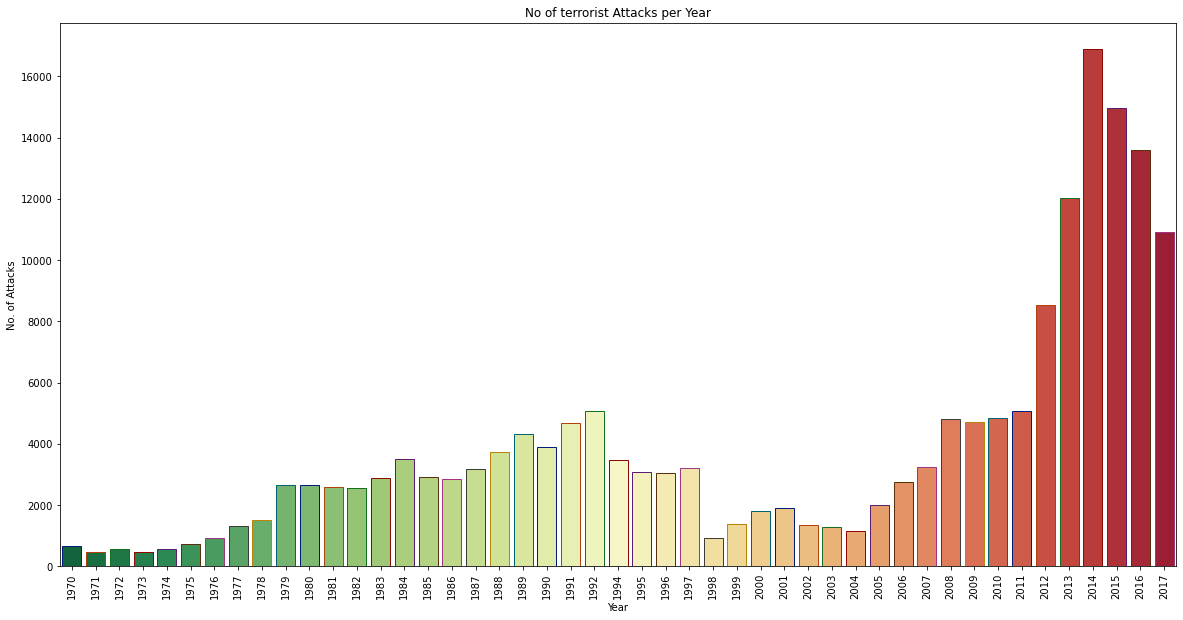

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.subplots(figsize = (20,10))
sn.countplot('Year',data = df,palette = 'RdYlGn_r', edgecolor = sn.color_palette('dark',10))
plt.xticks(rotation = 90)
plt.ylabel('No. of Attacks')
plt.title('No of terrorist Attacks per Year')
plt.show()

In [9]:
df1 = df.Country.value_counts()[:10] #top 10 
df1

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64